### Iris example multiclassification with categorical labels**

In [6]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1" # to disable GPU

import numpy as np
import matplotlib.pyplot as plt

from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense

from sklearn import datasets
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [7]:
def Analyze_training(h):
# summarize history for accuracy
   plt.plot(h.history['accuracy'])
   plt.plot(h.history['val_accuracy'])
   plt.title('model accuracy')
   plt.ylabel('accuracy')
   plt.xlabel('epoch')
   plt.legend(['train', 'test'], loc='upper left')
   plt.show()
# summarize history for loss
   plt.plot(h.history['loss'])
   plt.plot(h.history['val_loss'])
   plt.title('model loss')
   plt.ylabel('loss')
   plt.xlabel('epoch')
   plt.legend(['train', 'test'], loc='upper left')
   plt.show()
   return

    Load Iris Dataset using Keras module

In [8]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
categ_y = np_utils.to_categorical(y)
class_names = iris.target_names

split = int(0.90 * X.shape[0])

x_train = X[:split,:]
y_train = categ_y[:split,:]

x_test = X[split:,:]
y_test = categ_y[split:,:]

print("class_names: ", class_names)
print("categorical classes:", np.unique(categ_y, axis=0))

class_names:  ['setosa' 'versicolor' 'virginica']
categorical classes: [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


### Network definition

In [9]:
def network_model():
	# create model
	model = Sequential()
	model.add(Dense(128, input_dim=4, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

### Train network

In [10]:
my_network = network_model()
hist = my_network.fit(x_train,y_train, epochs=15, shuffle=True,batch_size=10,validation_data=(x_test, y_test))

Epoch 1/15
14/14 [==============================] - 0s 9ms/step - loss: 1.2988 - accuracy: 0.2667 - val_loss: 1.2897 - val_accuracy: 0.0000e+00
Epoch 2/15
14/14 [==============================] - 0s 3ms/step - loss: 0.9203 - accuracy: 0.6815 - val_loss: 1.2327 - val_accuracy: 0.0000e+00
Epoch 3/15
14/14 [==============================] - 0s 3ms/step - loss: 0.7964 - accuracy: 0.7259 - val_loss: 0.7480 - val_accuracy: 1.0000
Epoch 4/15
14/14 [==============================] - 0s 2ms/step - loss: 0.7020 - accuracy: 0.8074 - val_loss: 0.8773 - val_accuracy: 0.0000e+00
Epoch 5/15
14/14 [==============================] - 0s 3ms/step - loss: 0.6392 - accuracy: 0.7407 - val_loss: 0.8547 - val_accuracy: 0.0000e+00
Epoch 6/15
14/14 [==============================] - 0s 3ms/step - loss: 0.5943 - accuracy: 0.7778 - val_loss: 0.7686 - val_accuracy: 0.4667
Epoch 7/15
14/14 [==============================] - 0s 2ms/step - loss: 0.5451 - accuracy: 0.9111 - val_loss: 0.7032 - val_accuracy: 0.9333
Epoc

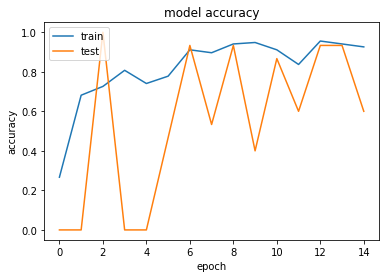

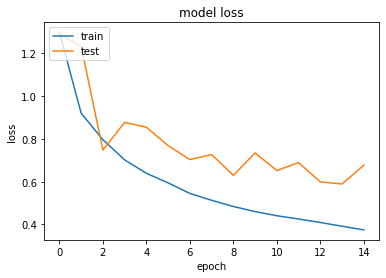

In [11]:
Analyze_training(hist)

In [12]:
#EOF